In [ ]:
#With Train/Val/Test split

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, GlobalAveragePooling1D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

df = pd.read_csv("wine_small_balanced.csv")
df = df.drop(['Unnamed: 0', 'country', 'designation', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery'], axis=1)

def sentiment_rating(rating):
    if(int(rating) < 90):
        return 0
    else:
        return 1

df.points = df.points.apply(sentiment_rating)
# df.columns = ['Review', 'Liked']
df.columns = ['Review', 'Points', 'Liked']

X = df.Review.astype('str')
y = df.Liked

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.666, random_state=0)  # 10% val, 20% test from the remaining 30%

vocab = 1000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab, oov_token="")
tokenizer.fit_on_texts(X_train)
train_sequence = tokenizer.texts_to_sequences(X_train)
val_sequence = tokenizer.texts_to_sequences(X_val)
test_sequence = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(train_sequence, maxlen=500)
padded_val = pad_sequences(val_sequence, maxlen=500)
padded_test = pad_sequences(test_sequence, maxlen=500)

model = Sequential()
model.add(Embedding(vocab, 1000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_train, y_train, validation_data=(padded_val, y_val), epochs=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Neural Network)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

def plot_accuracy_history(train_accuracies, val_accuracies, model_name):
    plt.plot(train_accuracies)
    plt.plot(val_accuracies)
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()




**SEQUENTIAL WITH PERFORMANCE METRICS OUTPUT**

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
Training Set Metrics:
Accuracy: 0.8619

Training Set Classification Report:
               precision    recall  f1-score   support

Not Liked (0)       0.85      0.88      0.87      1063
    Liked (1)       0.87      0.85      0.86      1037

     accuracy                           0.86      2100
    macro avg       0.86      0.86      0.86      2100
 weighted avg       0.86      0.86      0.86      2100



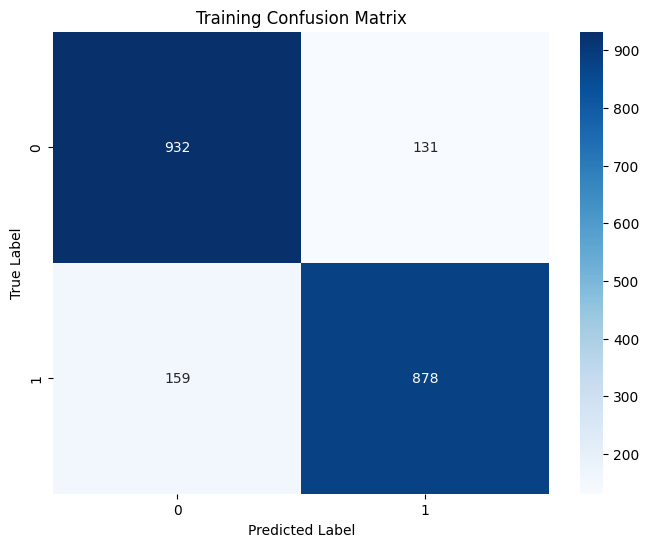

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Validation Set Metrics:
Accuracy: 0.8200

Validation Set Classification Report:
               precision    recall  f1-score   support

Not Liked (0)       0.78      0.87      0.82       143
    Liked (1)       0.87      0.78      0.82       157

     accuracy                           0.82       300
    macro avg       0.82      0.82      0.82       300
 weighted avg       0.82      0.82      0.82       300



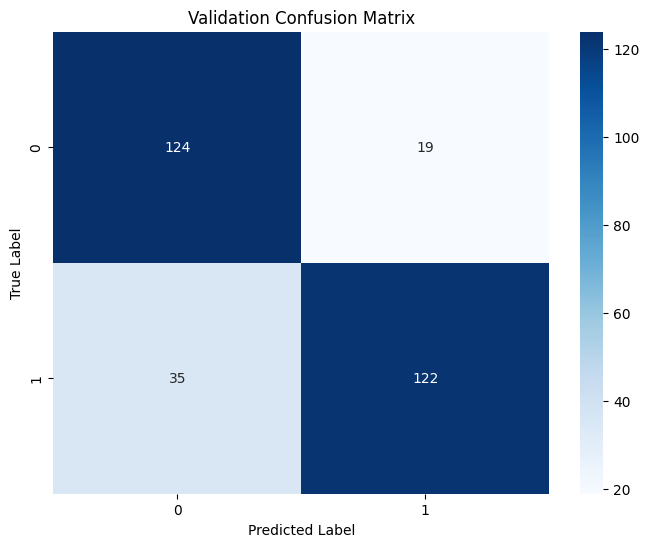

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Test Set Metrics:
Accuracy: 0.7783

Test Set Classification Report:
               precision    recall  f1-score   support

Not Liked (0)       0.76      0.80      0.78       294
    Liked (1)       0.80      0.76      0.78       306

     accuracy                           0.78       600
    macro avg       0.78      0.78      0.78       600
 weighted avg       0.78      0.78      0.78       600



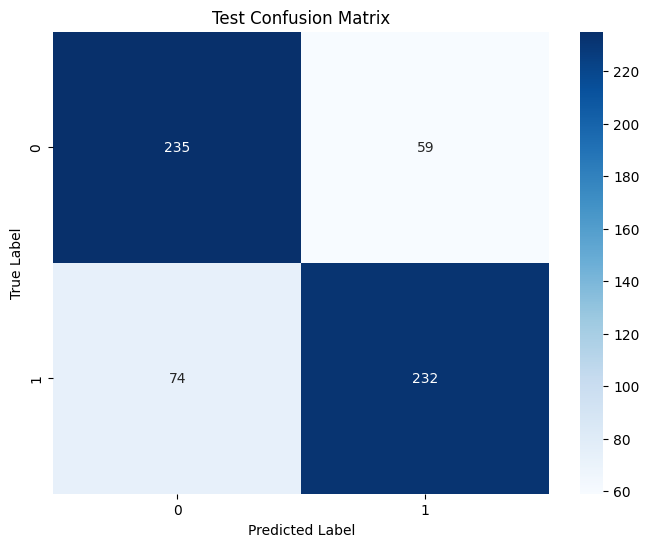

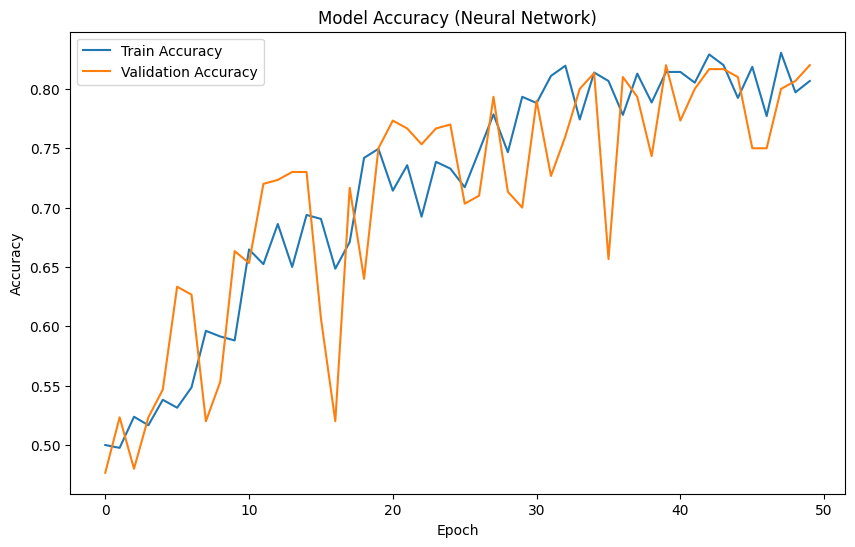

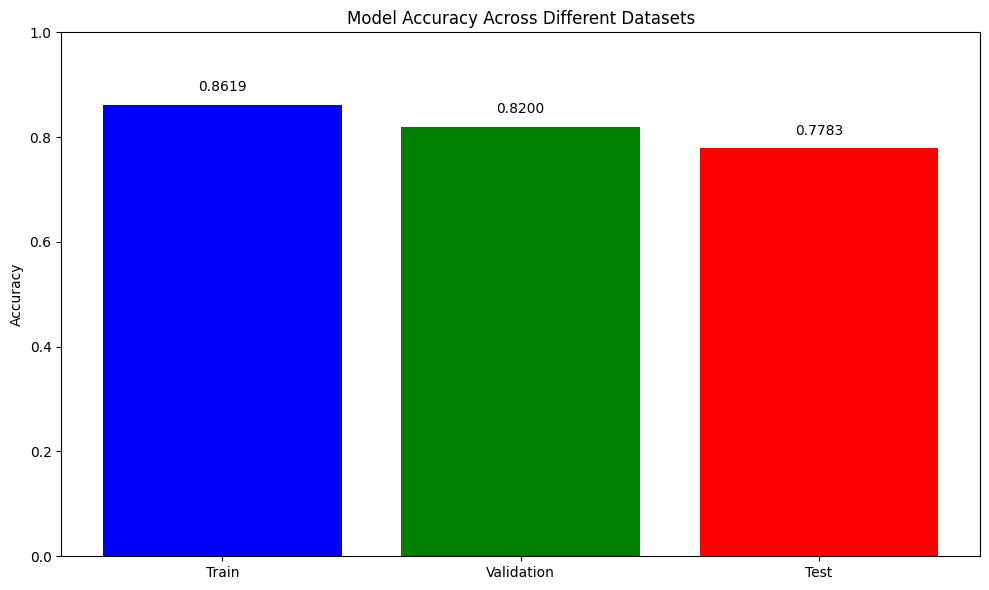

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
from keras.optimizers import Adam
import seaborn as sns

df = pd.read_csv("wine_small_balanced.csv")
df = df.drop(['Unnamed: 0', 'country', 'designation', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery'], axis=1)

def sentiment_rating(rating):
    return 1 if int(rating) >= 90 else 0

df.points = df.points.apply(sentiment_rating)
df.columns = ['Review', 'Points', 'Liked']

X = df.Review.astype('str')
y = df.Liked

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.666, random_state=0)

vocab = 1000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab, oov_token="")
tokenizer.fit_on_texts(X_train)
train_sequence = tokenizer.texts_to_sequences(X_train)
val_sequence = tokenizer.texts_to_sequences(X_val)
test_sequence = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(train_sequence, maxlen=500)
padded_val = pad_sequences(val_sequence, maxlen=500)
padded_test = pad_sequences(test_sequence, maxlen=500)

model = Sequential()
model.add(Embedding(vocab, 1000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    padded_train, y_train,
    validation_data=(padded_val, y_val),
    epochs=50,
    verbose=0
    )

def evaluate_model(X, y, dataset_name):
    X_padded = pad_sequences(
        tokenizer.texts_to_sequences(X),
        maxlen=500
    )

    y_pred = (model.predict(X_padded) > 0.5).astype(int).flatten()

    accuracy = accuracy_score(y, y_pred)

    print(f"{dataset_name} Set Metrics:")
    print(f"Accuracy: {accuracy:.4f}")

    print(f"\n{dataset_name} Set Classification Report:")
    print(classification_report(y, y_pred, target_names=['Not Liked (0)', 'Liked (1)']))

    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{dataset_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return accuracy

train_accuracy = evaluate_model(X_train, y_train, 'Training')
val_accuracy = evaluate_model(X_val, y_val, 'Validation')
test_accuracy = evaluate_model(X_test, y_test, 'Test')

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Neural Network)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
sets = ['Train', 'Validation', 'Test']
accuracies = [train_accuracy, val_accuracy, test_accuracy]

plt.bar(sets, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Across Different Datasets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
from keras.optimizers import Adam
import seaborn as sns

df = pd.read_csv("winemag-data_first150k.csv")
df = df.drop(['Unnamed: 0', 'country', 'designation', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery'], axis=1)

def sentiment_rating(rating):
    return 1 if int(rating) >= 90 else 0

df.points = df.points.apply(sentiment_rating)
df.columns = ['Review', 'Liked']

X = df.Review.astype('str')
y = df.Liked

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.666, random_state=0)

vocab = 1000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab, oov_token="")
tokenizer.fit_on_texts(X_train)
train_sequence = tokenizer.texts_to_sequences(X_train)
val_sequence = tokenizer.texts_to_sequences(X_val)
test_sequence = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(train_sequence, maxlen=500)
padded_val = pad_sequences(val_sequence, maxlen=500)
padded_test = pad_sequences(test_sequence, maxlen=500)

model = Sequential()
model.add(Embedding(vocab, 5000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    padded_train, y_train,
    validation_data=(padded_val, y_val),
    epochs=50,
    verbose=0

def evaluate_model(X, y, dataset_name):
    X_padded = pad_sequences(
        tokenizer.texts_to_sequences(X),
        maxlen=500
    )

    y_pred = (model.predict(X_padded) > 0.5).astype(int).flatten()

    accuracy = accuracy_score(y, y_pred)

    print(f"{dataset_name} Set Metrics:")
    print(f"Accuracy: {accuracy:.4f}")

    print(f"\n{dataset_name} Set Classification Report:")
    print(classification_report(y, y_pred, target_names=['Not Liked (0)', 'Liked (1)']))

    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{dataset_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return accuracy

train_accuracy = evaluate_model(X_train, y_train, 'Training')
val_accuracy = evaluate_model(X_val, y_val, 'Validation')
test_accuracy = evaluate_model(X_test, y_test, 'Test')

# # Plotting the accuracy of the neural network
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy (Neural Network)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()

plt.figure(figsize=(10, 6))
sets = ['Train', 'Validation', 'Test']
accuracies = [train_accuracy, val_accuracy, test_accuracy]

plt.bar(sets, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Across Different Datasets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()